In [1]:
import numpy as np
import os
import random
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import sklearn.datasets, sklearn.decomposition
from matplotlib.transforms import ScaledTranslation


def traintestMNIST(labels=None, ntrain=None, ntest=None, path=os.path.join('data_for_python', 'mnist.npz')):
    mnist = np.load(path)
    train_x = mnist['train_x']
    train_y = mnist['train_y']
    train = np.asarray(list(zip(train_x, train_y)))

    test_x = mnist['test_x']
    test_y = mnist['test_y']
    test = np.asarray(list(zip(test_x, test_y)))

    if labels:
        train = list(train[np.hstack([np.where(train_y==l) for l in labels]).squeeze()])
        test = list(test[np.hstack([np.where(test_y==l) for l in labels]).squeeze()])

    random.shuffle(train)
    random.shuffle(test)

    train_x, train_y = zip(*train)
    test_x, test_y = zip(*test)

    if ntrain:
        train_x = train_x[:ntrain]
        train_y = train_y[:ntrain]

    if ntest:
        test_x = test_x[:ntest]
        test_y = test_y[:ntest]

    return np.asarray(train_x), np.asarray(train_y), np.asarray(test_x), np.asarray(test_y)

In [2]:
#trainImages, trainLabels, testImages, testLabels
tI, tL, teI, teL = traintestMNIST([0,1,2,3,4],5000)

In [3]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(tI)
'''
teest=[]
print(neigh.kneighbors([tI[0,:]]))
print(neigh.kneighbors([tI[0,:]])[1])
flattened = [val for sublist in neigh.kneighbors([tI[4999,:]], return_distance=False) for val in sublist][0]
print(flattened)
'''
#print(tL[flattened[0]])
#print(teL[flattened[0]])

ma_val=0
for i in range(5000):
    fl = [val for sublist in neigh.kneighbors([teI[i,:]], return_distance=False) for val in sublist][0] #pour flatten la valeur
    #fl contient l'indice du NN-1 présent dans la liste tI
    #print(tL[fl],teL[i])
    if (tL[fl] == teL[i]):
        ma_val+=1
        
print('Nombre de tests réussis sur 5000:',ma_val,", ce qui donne un pourcentage de:",ma_val/5000)
    
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier


Nombre de tests réussis sur 5000: 4921 , ce qui donne un pourcentage de: 0.9842


In [4]:
#partie 2)
from sklearn.neighbors import KNeighborsClassifier

pca = PCA() 
pca.fit(tI)
pcs = pca.components_ 
mu=pca.mean_ 

cl = KNeighborsClassifier(n_neighbors=1)
cl.fit(tI,tL)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [5]:
liste=np.append([10,20,30,40],range(50,751,50))
#err=np.zeros(len(liste))
#it=0
liste2=[1,3]
err=[]
for m in liste:
    pc=pcs[0:m+1] 
    prod_scal=(tI-mu)@(pc.T).real 
    rec=((prod_scal@pc)+mu).real 
    #err[it]=np.mean((np.apply_along_axis(np.linalg.norm, 0, tI - rec)) ** 2)
    #it=it+1
    #print(cl.predict(rec))
    err.append(np.mean(cl.predict(rec)!=tL)) #ajoute au vect err l'esperance de l'erreur commise par la reconstruction PCA par rapport à son label original

Text(0, 0.5, 'erreur')

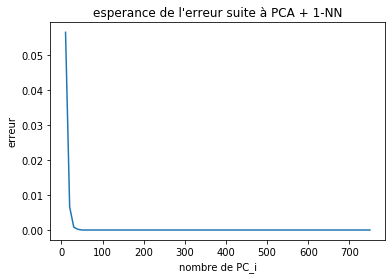

In [6]:
plt.plot(liste,err)
plt.title("esperance de l'erreur suite à PCA + 1-NN")
plt.xlabel("nombre de PC_i")
plt.ylabel("erreur")

In [7]:
#rec.shape#(5000, 784)
#tI.shape (5000, 784)

In [8]:
print(err)

[0.0564, 0.0066, 0.0008, 0.0002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
